In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values="?")



In [ ]:
 #binary classification# Preprocessing
data = data.dropna()  # Drop rows with missing values
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert target to

In [ ]:
data['target']

,target
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [ ]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Define the CNN model
def create_cnn_model(learning_rate=0.001, num_neurons=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model




In [ ]:
# Grasshopper Optimization Algorithm (GHO)
class GrasshopperOptimization:
    def __init__(self, population_size, num_iterations, search_space):
        self.population_size = population_size
        self.num_iterations = num_iterations
        self.search_space = search_space
        self.best_solution = None
        self.best_fitness = float('inf')

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            solution = {}
            for param, (lower, upper) in self.search_space.items():
                solution[param] = np.random.uniform(lower, upper)
            population.append(solution)
        return population

    def evaluate_fitness(self, solution):
      try:
        model = create_cnn_model(learning_rate=solution['learning_rate'],
                                 num_neurons=int(solution['num_neurons']),
                                 dropout_rate=solution['dropout_rate'])
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        return accuracy  # We want to maximize accuracy
      except Exception as e:
        print(f"Error during fitness evaluation: {e}")
        return 0  # Return a default fitness value if evaluation fails

    def update_grasshoppers(self, population):
        for i in range(self.population_size):
            new_solution = {}
            for param in self.search_space.keys():
                new_solution[param] = population[i][param] + np.random.uniform(-1, 1)
                # Ensure the new value is within the search space
                new_solution[param] = np.clip(new_solution[param], self.search_space[param][0], self.search_space[param][1])
            population[i] = new_solution
        return population

    def optimize(self):
      population = self.initialize_population()
    # Initialize best_solution and best_fitness
      self.best_solution = population[0]
      self.best_fitness = self.evaluate_fitness(population[0])

      for iteration in range(self.num_iterations):
          for i in range(self.population_size):
              fitness = self.evaluate_fitness(population[i])
              if fitness > self.best_fitness:
                  self.best_fitness = fitness
                  self.best_solution = population[i]
          population = self.update_grasshoppers(population)
          print(f"Iteration {iteration + 1}, Best Fitness: {self.best_fitness}")
      return self.best_solution, self.best_fitness



In [ ]:
search_space = {
    'learning_rate': (0.003, 0.01),
    'num_neurons': (32, 128),
    'dropout_rate': (0.2, 0.5)
}

# Initialize and run the GHO optimizer
gho = GrasshopperOptimization(population_size=10, num_iterations=20, search_space=search_space)
best_solution, best_fitness = gho.optimize()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Iteration 1, Best Fitness: 0.9333333373069763
Iteration 2, Best Fitness: 0.9333333373069763
Iteration 3, Best Fitness: 0.9333333373069763
Iteration 4, Best Fitness: 0.9333333373069763
Iteration 5, Best Fitness: 0.9333333373069763
Iteration 6, Best Fitness: 0.9333333373069763
Iteration 7, Best Fitness: 0.9333333373069763
Iteration 8, Best Fitness: 0.9333333373069763
Iteration 9, Best Fitness: 0.9333333373069763
Iteration 10, Best Fitness: 0.9333333373069763
Iteration 11, Best Fitness: 0.9333333373069763
Iteration 12, Best Fitness: 0.9333333373069763
Iteration 13, Best Fitness: 0.9333333373069763
Iteration 14, Best Fitness: 0.9333333373069763
Iteration 15, Best Fitness: 0.9333333373069763
Iteration 16, Best Fitness: 0.9333333373069763
Iteration 17, Best Fitness: 0.9333333373069763
Iteration 18, Best Fitness: 0.9333333373069763
Iteration 19, Best Fitness: 0.9333333373069763
Iteration 20, Best Fitness: 0.9333333373069763


In [ ]:
final_model = create_cnn_model(learning_rate=best_solution['learning_rate'],
                               num_neurons=int(best_solution['num_neurons']),
                               dropout_rate=best_solution['dropout_rate'])
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.5740 - loss: 0.6850
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7614 - loss: 0.4857 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7817 - loss: 0.4758 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8161 - loss: 0.4599 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8390 - loss: 0.3954 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8348 - loss: 0.3788 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.4159 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8739 - loss: 0.3116 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8672 - loss: 0.2943 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8299 - loss: 0.3681 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8835 - loss: 0.3373 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8805 - loss: 0.2937 


In [ ]:
y_pred = final_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9
Precision: 0.95
Recall: 0.7916666666666666
F1-Score: 0.8636363636363636
ROC AUC: 0.8819444444444443


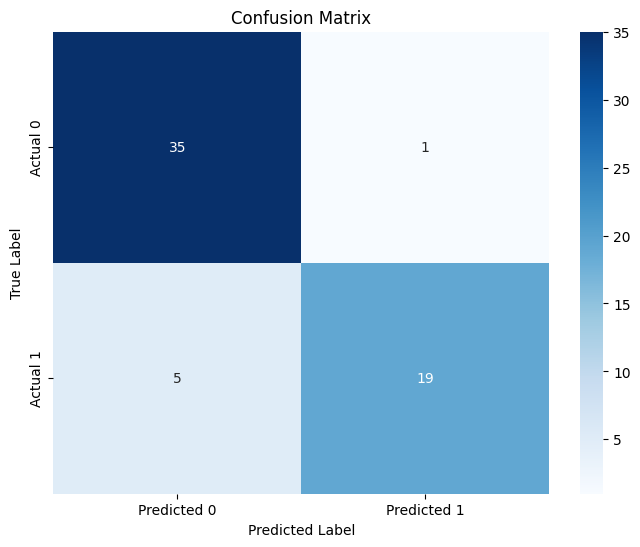

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


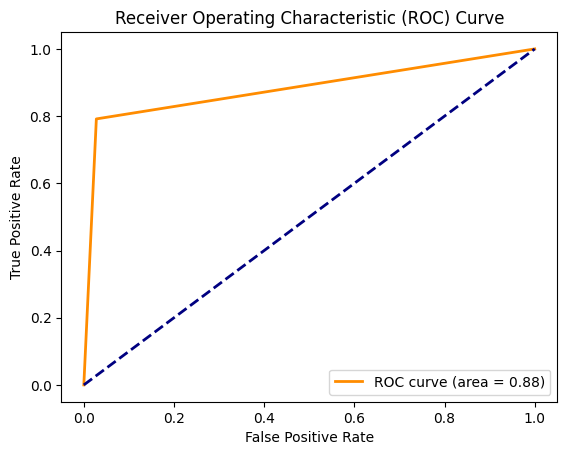

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

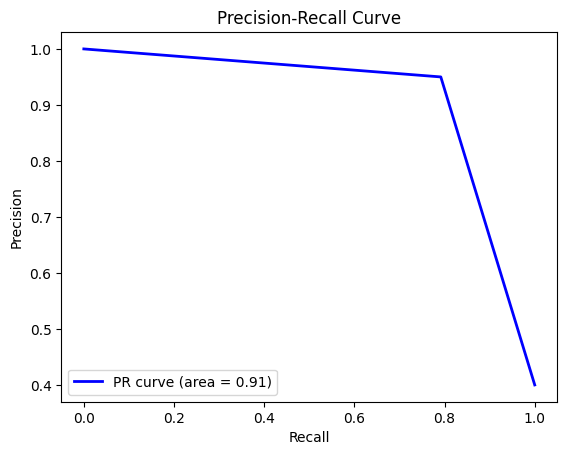

In [ ]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_curve, precision_curve)

plt.figure()
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:

final_model = create_cnn_model(learning_rate=best_solution['learning_rate'],
                               num_neurons=int(best_solution['num_neurons']),
                               dropout_rate=best_solution['dropout_rate'])

# Train the model with validation data
history = final_model.fit(X_train, y_train,
                          epochs=50,
                          batch_size=32,
                          validation_data=(X_test, y_test),
                          verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.5525 - loss: 0.7074 - val_accuracy: 0.9167 - val_loss: 0.4276
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7735 - loss: 0.5132 - val_accuracy: 0.8833 - val_loss: 0.3405
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8236 - loss: 0.4300 - val_accuracy: 0.8833 - val_loss: 0.3096
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8482 - loss: 0.3844 - val_accuracy: 0.8667 - val_loss: 0.3056
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8525 - loss: 0.3574 - val_accuracy: 0.8667 - val_loss: 0.3078
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8633 - loss: 0.3230 - val_accuracy: 0.8667 - val_loss: 0.3154
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8029 - loss: 0.4225 - val_accuracy: 0.8667 - val_loss: 0.3248
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8306 - loss: 0.3437 - val_accuracy: 0.8667 - val_loss: 0.3214
Epoch 9/50
8/8

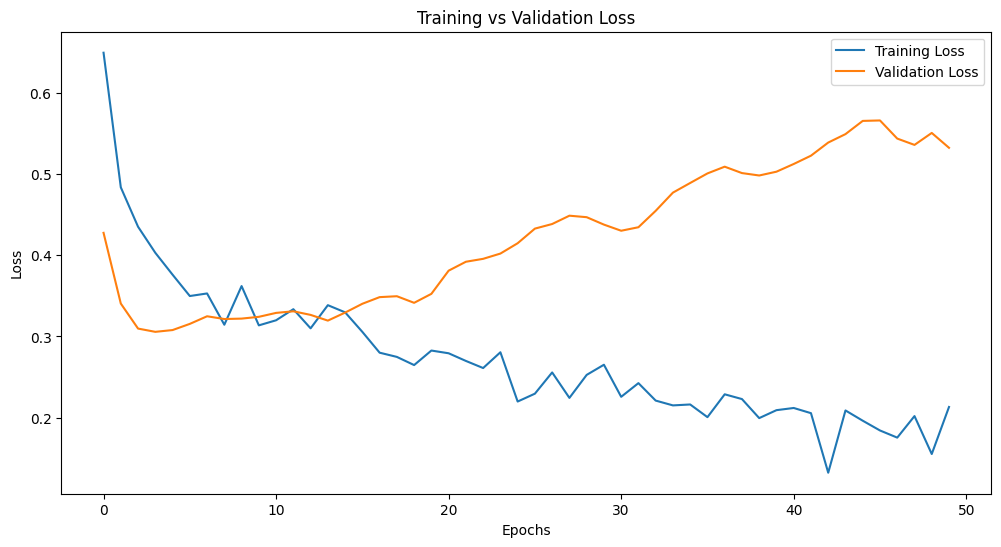

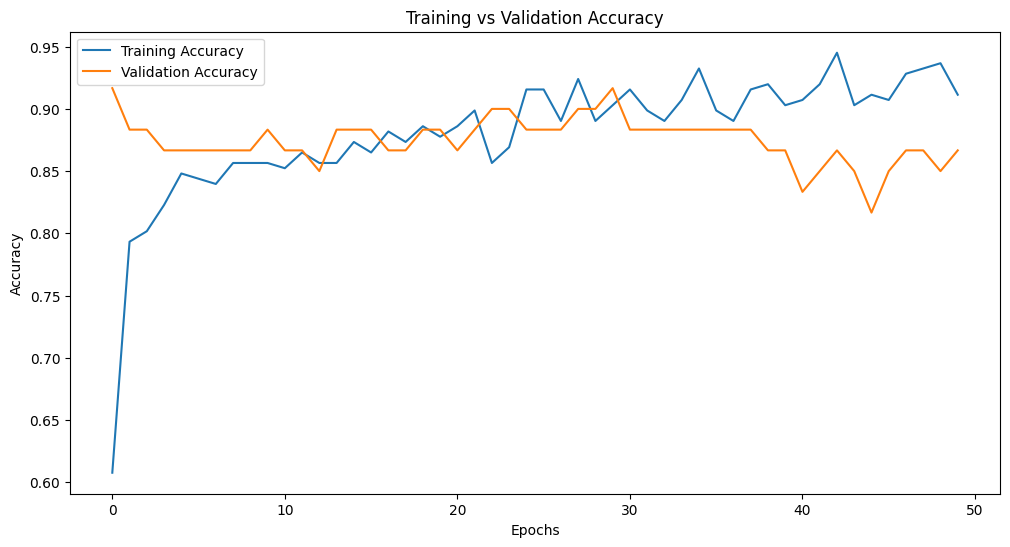

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()